In [ ]:
! pip install tensorflow
! pip install -q kaggle
! pip install keras-preprocessing

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           6778        256  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           2478         65  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           2534         53  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

## Download the data

In [ ]:
! kaggle datasets download -d gpiosenka/butterfly-images40-species

100% 453M/454M [00:33<00:00, 14.9MB/s]
100% 454M/454M [00:33<00:00, 14.0MB/s]


In [ ]:
! mkdir butterflies_data
! unzip butterfly-images40-species.zip -d butterflies_data

Streaming output truncated to the last 5000 lines.
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/111.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/112.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/113.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/114.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/115.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/116.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/117.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/118.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/119.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/120.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/121.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/122.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOISESHELL/123.jpg  
  inflating: butterflies_data/train/MILBERTS TORTOIS

## Importing

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
from PIL import Image
import numpy as np


## Training, Validation and Test Set

In [ ]:
batch_size = 32
img_height = 224 
img_width = 224 

In [ ]:
image_data_gen = ImageDataGenerator(rescale=1/255.0,
                                    rotation_range=50,
                                    shear_range=30.0,
                                    horizontal_flip=True,
                                    fill_mode="nearest")

In [ ]:
image_data_gen2 = ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_ds = image_data_gen.flow_from_directory(
  "/content/butterflies_data/train",
  seed=123,
  color_mode="rgb",
  shuffle=True,
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 12639 images belonging to 100 classes.


In [ ]:
import json
data = train_ds.class_indices
with open("/content/butterfly_classes.json", "w") as final:
    json.dump(data, final)
# download the json file
files.download('/content/butterfly_classes.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
val_ds = image_data_gen2.flow_from_directory(
  "/content/butterflies_data/valid",
  seed=123,
  color_mode="rgb",
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 images belonging to 100 classes.


In [ ]:
test_ds = image_data_gen2.flow_from_directory(
  "/content/butterflies_data/test",
  seed=123,
  color_mode="rgb",
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 images belonging to 100 classes.


## Images

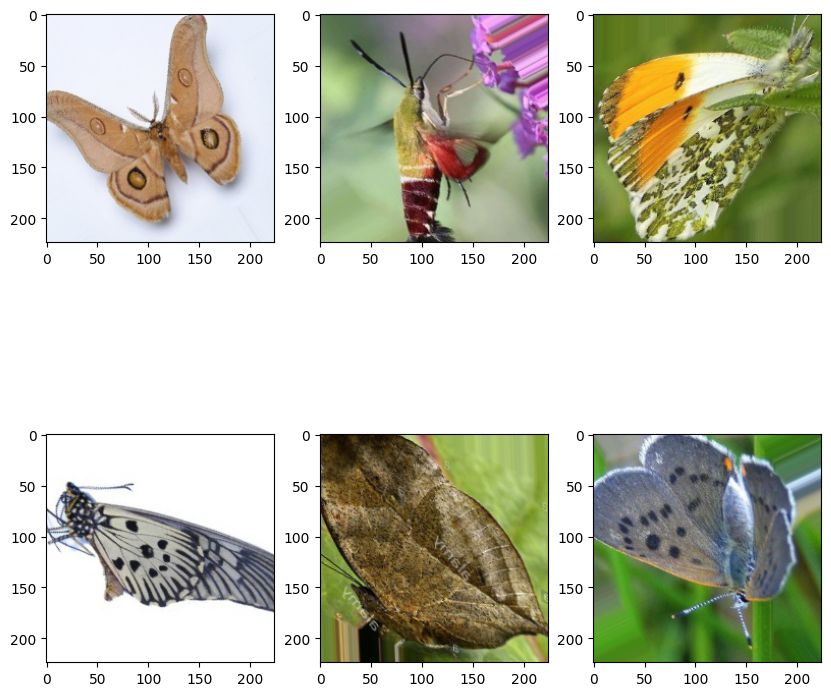

In [ ]:
plt.figure(figsize=(10,10))
for i in range(6):
    ax = plt.subplot(2,3,i+1)
    img, label = train_ds.next()
    # idx = label[i].argmax()
    # for key in train_ds.class_indices.keys():
    #    if train_ds.class_indices[key]==idx:
    #      value = key
    # plt.title(value)
    plt.imshow(img[0])
plt.show()


## Convulation 

In [ ]:
image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

1.382979e-05 0.98211205


In [ ]:
num_classes = 100

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'), #3 kernel
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'), #128
  tf.keras.layers.Dense(num_classes, activation="softmax")
])

In [ ]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/40
395/395 [==============================] - 173s 429ms/step - loss: 3.7322 - accuracy: 0.1556 - val_loss: 2.8908 - val_accuracy: 0.3020
Epoch 2/40
395/395 [==============================] - 160s 405ms/step - loss: 2.4081 - accuracy: 0.3755 - val_loss: 2.1147 - val_accuracy: 0.4800
Epoch 3/40
395/395 [==============================] - 159s 403ms/step - loss: 1.9480 - accuracy: 0.4816 - val_loss: 1.7813 - val_accuracy: 0.5220
Epoch 4/40
395/395 [==============================] - 158s 400ms/step - loss: 1.6719 - accuracy: 0.5510 - val_loss: 1.5176 - val_accuracy: 0.5920
Epoch 5/40
395/395 [==============================] - 159s 404ms/step - loss: 1.4704 - accuracy: 0.5962 - val_loss: 1.4580 - val_accuracy: 0.6260
Epoch 6/40
395/395 [==============================] - 159s 402ms/step - loss: 1.3471 - accuracy: 0.6285 - val_loss: 1.3064 - val_accuracy: 0.6540
Epoch 7/40
395/395 [==============================] - 163s 412ms/step - loss: 1.2154 - accuracy: 0.6648 - val_loss: 1.1484 -

In [ ]:
history.history

## Predict

In [ ]:
predictions = model.predict(test_ds)
np.argmax(predictions[0])

16/16 [==============================] - 5s 329ms/step


60

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print('\nTest accuracy:', test_acc)

16/16 [==============================] - 7s 466ms/step - loss: 0.8112 - accuracy: 0.8160

Test accuracy: 0.8159999847412109


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save("/content/gdrive/MyDrive/Butterfly_Model")